## Utility functions

In [104]:
import glob
import json
import random

In [163]:
def get_data(image_path, annotations_path, sample_size, datatype = 'train'):
    
    random.seed(123)
    
    # Get paths of individual images
    images_path = glob.glob(f"{image_path}/{datatype}2014/*")
    
    # Extract a list of all images that includes human
    with open(f'{annotations_path}/instances_{datatype}2014.json') as f:
      instances_json = json.load(f)
    image_category_dict = dict()
    for i in range(len(instances_json['annotations'])):
        cat_id = instances_json['annotations'][i]['category_id']
        image_id = instances_json['annotations'][i]['image_id']
        # If we are to exclude images of more than one person
        # if instances_json['annotations'][i]['iscrowd'] == 0:
        if cat_id in image_category_dict:
            image_category_dict[cat_id] += [image_id]
        else:
            image_category_dict[cat_id] = [image_id]
    human_image_ids = set(image_category_dict[1]) #human images are of category 1, remove duplicates
    
    # Select sample out of all human images
    training_image_ids = random.sample(human_image_ids, sample_size)
    
    # Build dictionaries to map image ids to filenames and captions to images
    with open(f'{annotations_path}/captions_{datatype}2014.json') as f:
      captions_json = json.load(f)

    image_id_dict = dict()
    # key = image_id, value = image_fname
    for i in range(len(captions_json['images'])):
        image_id = captions_json['images'][i]['id']
        image_fname = captions_json['images'][i]['file_name']
        image_id_dict[image_id] = image_fname

    captions_dict = dict()
    # key = image_id, value = list of captions
    for i in range(len(captions_json['annotations'])):
        image_id = captions_json['annotations'][i]['image_id']
        caption = captions_json['annotations'][i]['caption']
        if image_id in training_image_ids and image_id in captions_dict:
            captions_dict[image_id] += [caption]
        elif image_id in training_image_ids:
            captions_dict[image_id] = [caption]
            
    return training_image_ids, images_path, image_id_dict, captions_dict

In [160]:
image_path = './data/images/'
annotations_path = './data/annotations/'
sample_size = 100
training_image_ids, images_path, image_id_dict, captions_dict = get_data(image_path, annotations_path, sample_size)

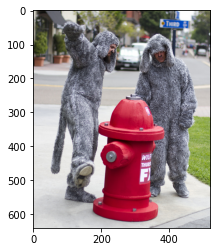

['Two people in dog suits, one raising his leg on the fire hydrant.', 'Two men are dressed like dogs and standing next to a fire hydrant.', 'There are two men dressed as dogs standing near a fire hydrant', 'Two people that are dressed up in a costume.', 'Two people dressed as dogs standing around a fire hydrant.']


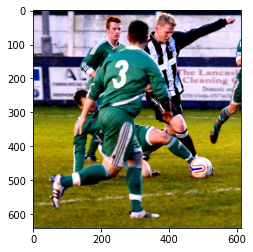

['Some soccer players playing a game of soccer together.', 'A group of men playing a game of soccer.', 'A group of young men play a game of soccer.', 'A group of people that are in the grass with a soccer ball.', 'Men in uniforms playing soccer on a field.']


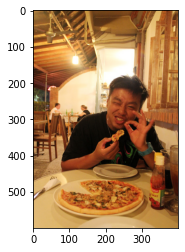

['An Asain man poses with some pizza inside.', 'A man sitting at a table eating a slice of pizza.', 'A person is posing for a big picture. ', 'A man sitting at a table eating a slice of pizza.', 'The man grins as he holds a slice of pizza.']


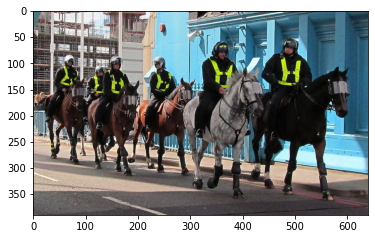

['A group of people doing security on horseback.', 'Group of men in suits all riding horses down an open roadway.', 'Six police horse mounted patrol traveling down street.', 'Police officers on mounted patrol wearing reflective clothing', 'Police officers riding on the back of horses. ']


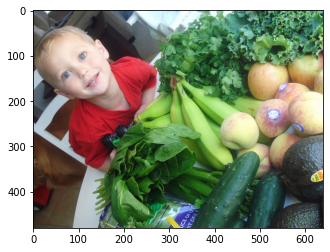

['A young boy sitting at a table filled with fruits and vegetables.', 'A young child at a table filled with various fruits and vegetables.', 'A young boy is at a table of fruit and vegetables.', 'Little boy standing near a table full of vegetables.', 'A young boy sitting next to a table of vegetables.']


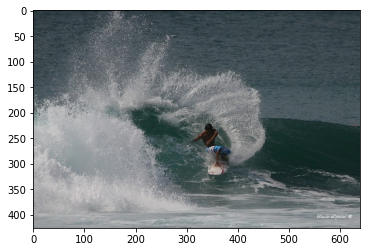

['A man surfs down the other side of a crashing wave.', 'A young man is on his surf board trying to ride the waves. ', 'A man throwing up water while surfing a wave.', 'A man carving a wide turn while surfing a big wave.', 'a surfer in blue trunks is surfing on a white board']


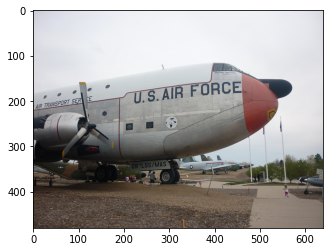

['A small child walking by an old and very big aircraft on display. ', 'An old u.s. Air Force jumbo jet with people under it.', 'a large air plane in a field near other planes', 'A large US Air Force plane is sitting in a field of mulch for display.', 'a big bomber plane sits parked next to some other planes ']


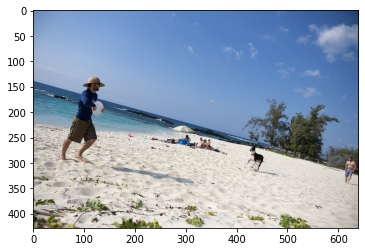

['A man holding a white frisbee on a sandy beach.', 'A man in a straw hat holding a frisbee with a dog.', 'A man with  a frisbee wearing a had walking on a beach.', 'Several people and a dog on a beach.', 'People are playing and sunning in the sand on a beach.']


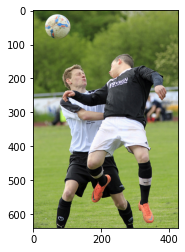

['A couple of young men playing a game of soccer.', 'Two men in black and white uniforms playing soccer. ', 'Two men are outside and playing soccer with each other.', 'Two people are outside on the grass playing soccer.', 'A couple of guys are playing a soccer game']


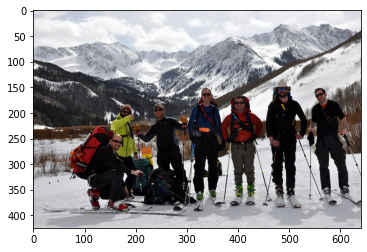

['Skiers posing in front of a mountain range. ', 'There are a group of friends standing on the snow bank', 'A group of people in ski gear on snowy area with trees in background.', 'A group of people standing side by side.', 'Seven skiers pose for a picture on a mountain.']


In [164]:
###### Example of selected captions
import matplotlib.pyplot as plt

egs = random.sample(training_image_ids, 10)
for eg in egs:
    img = plt.imread(image_path + "train2014/"+ image_id_dict[eg])
    plt.imshow(img)
    plt.show()
    print(captions_dict[eg])